In [56]:
import matplotlib.pyplot as plt
import numpy
%run unit_exponentials.ipynb

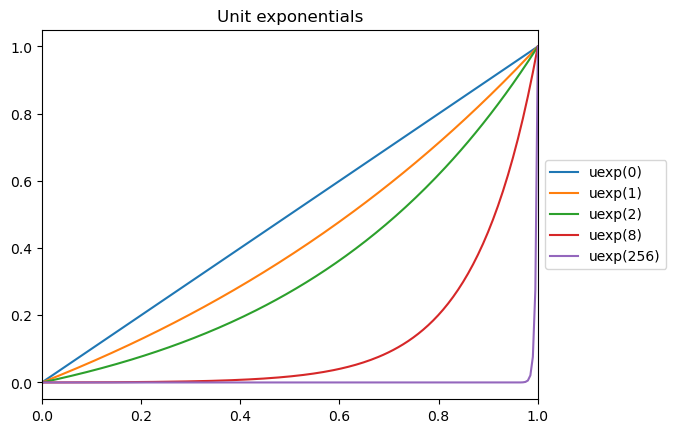

In [67]:
# Some unit exponentials
exps = [0,1,2,8,256]

def plot_uexps(exps,n_xs=200):
    xx = numpy.linspace(0,1,n_xs)

    for exp in exps:
        yy = uexp(exp)(xx)

        plt.plot(xx,yy,label=f"uexp({exp})")

    ax = plt.gca()
    ax.set_xlim([0,1])

    plt.title(f"Unit exponentials")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
        
    plt.show()

plot_uexps(exps)

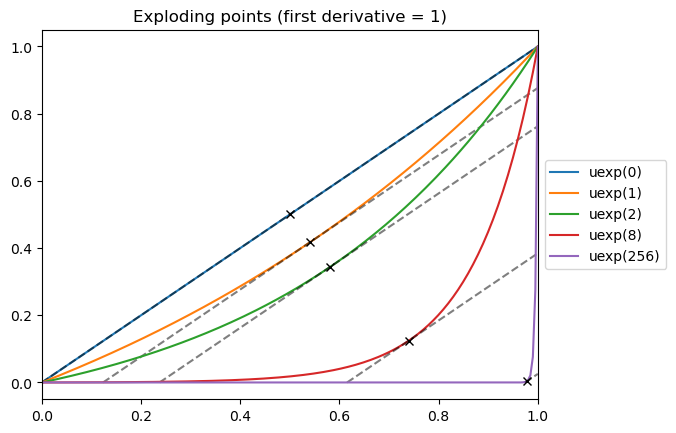

In [68]:
# Kicking points
exps = [0,1,2,8,256]

def plot_exploding_points_uexps(exps,n_xs=200):
    xx = numpy.linspace(0,1,n_xs)

    for exp in exps:
        f = uexp(exp)
        yy = f(xx)        

        plt.plot(xx,yy,label=f"uexp({exp})")

        exploding_point = exploding_point_uexp(exp)
        f_exploding_point = f(exploding_point)

        plt.plot(exploding_point,f_exploding_point,color="k",marker="x")#,marker=[(-1,-1),(1,1)],markersize=20)

        start_exploding_tangent = exploding_point - f_exploding_point
        exploding_tangent_xx = numpy.linspace(start_exploding_tangent,1,3)
        exploding_tangent_yy = f_exploding_point-exploding_point+exploding_tangent_xx

        plt.plot(exploding_tangent_xx,exploding_tangent_yy,color="k",linestyle="dashed",alpha=0.5)

    ax = plt.gca()
    ax.set_xlim([0,1])
    #ax.set_aspect("equal")

    plt.title(f"Exploding points (first derivative = 1)")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
        
    plt.show()

plot_exploding_points_uexps(exps)

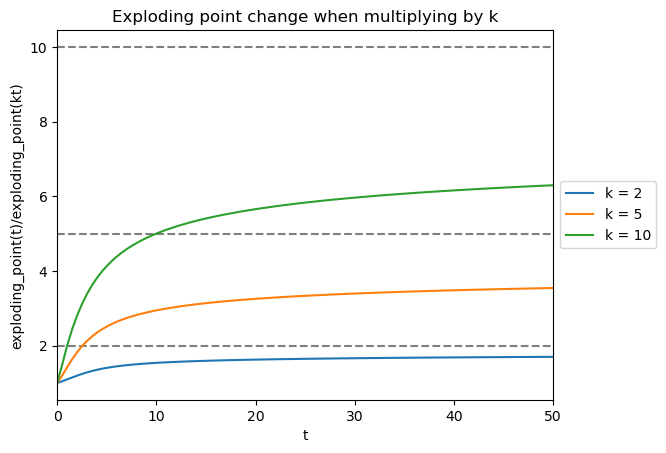

In [78]:
ks = [2,5,10]

def plot_exploding_point_evolution(ks,min_t=0,max_t=50,n_ts=100):
    tt = numpy.linspace(min_t,max_t,n_ts)

    for k in ks:
        exploding_point_tt = numpy.array([exploding_point_uexp(t) for t in tt])
        exploding_point_ktt = numpy.array([exploding_point_uexp(k*t) for t in tt])
        yy = (1.0-exploding_point_tt)/(1.0-exploding_point_ktt)
        
        plt.plot(tt,yy,label=f"k = {k}")
        plt.plot(tt,numpy.full_like(tt,k),color="k",linestyle="dashed",alpha=0.5)

    ax = plt.gca()
    ax.set_xlim([min_t,max_t])

    plt.title(f"Exploding point change when multiplying by k")
    plt.xlabel(f"t")
    plt.ylabel(f"exploding_point(t)/exploding_point(kt)")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
        
    plt.show()

plot_exploding_point_evolution(ks)